# Experiment Design

## Unit of Diversion (provided by Udacity)

The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.


## Initial Hypothesis (Provided by Udacity)

The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course. 

# Metric Choice

- Number of cookies: That is, number of unique cookies to view the course overview page. (dmin=3000)
- Number of user-ids: That is, number of users who enroll in the free trial. (dmin=50)
- Number of clicks: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)
- Click-through-probability: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
- Gross conversion: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
- Retention: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
- Net conversion: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)


## Choosing Invariant Metrics

Invariant Metrics are the metrics which should not change across control and experiment groups during the course of the experiment.

- Number of cookies
- Number of clicks
- Click-through-probability

## Choosing Evaluation Metrics

Evaluation metrics were chosen since there is the possibility of different distributions between experiment and control groups as a function of the experiment. Each evaluation metric is associated with a minimum difference (dmin) that must be observed for consideration in the decision to launch the experiment. The ultimate goal is to minimize student frustration and satisfaction and to most effectively use limited coaching resources. Cancelling early may be one indication of frustration or low satisfaction and the more students enrolled in the course who do not make at least one payment, much less finish the course, the less coaching resources are being used effectively. With this in mind, in order to consider launching the experiment either of the following must be observed:

- Gross conversion: we expect this metric will be decreased in experiment group. (users get the question and will have a second to consider enroll or not, this will filter some users who are not willing to checkout after free trial period).

- Retention: we expect this metric will be increased in experiment group. (more students staying beyond the free trial in the experiment group).

- Net conversion: we expect this metric will be increased in experiment group.


### Unused Metrics

- Number of user-ids: User-ids are tracked only after enrolling in the free trial, so we cannot expect the equal distribution between the control and experimental group. It isn't normalized, so it's not an ideal evaluation metrics.

# Measuring Variability

### Baseline Values

In [142]:
#import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#import csv file
baseline = pd.read_csv('Final Project Baseline Values - Sheet1.csv', header=None)

# adjust the dataset 
baseline.columns = ['Metrics','Estimator']
baseline['Metrics'] = ['cookies', 'cliks', 'user-id','click-through-probability','gross conversion','retention','net conversion']
baseline['dmin'] = [3000, 240, -50, 0.01, -0.01, 0.01, 0.0075]
baseline

,Metrics,Estimator,dmin
0,cookies,40000.000000,3000.0000
1,cliks,3200.000000,240.0000
2,user-id,660.000000,-50.0000
3,click-through-probability,0.080000,0.0100
4,gross conversion,0.206250,-0.0100
5,retention,0.530000,0.0100
6,net conversion,0.109313,0.0075


### Scaled Estimator
Since we have already set the sample size of 5000 unique cookies, we should calculate the estimated data for clicks, user-id, which are necessary for us to get the standard deviation in the certain sample size.

In [71]:
# insert column
baseline['Scaled Estimator'] = np.nan

# scaled fraction 
fraction = 5000/40000

for i in range(3):
    baseline.loc[i,'Scaled Estimator'] = baseline['Estimator'][i]*fraction
    
baseline

,Metrics,Estimator,dmin,Scaled Estimator
0,cookies,40000.000000,3000.0000,5000.0
1,cliks,3200.000000,240.0000,400.0
2,user-id,660.000000,-50.0000,82.5
3,click-through-probability,0.080000,0.0100,NaN
4,gross conversion,0.206250,-0.0100,NaN
5,retention,0.530000,0.0100,NaN
6,net conversion,0.109313,0.0075,NaN


## Calculating Standard Deviation
### Assumption
Now, we can calculate the standard deviation of gross conversion, retention, and net conversion. And there is an assumption that we should make. For those three propability metrics, we assume their distributions are approximately normal (binomial distribution) because the scaled estimators are large (Central Limit Theorem).

However, if we are not sure. We can also test it using the normal approximation, i.e np>10 and np(1-p)>10

In [72]:
# the normal approximation function
def normal_A(n,p,metric):
    if 10 < n*p and 10 < n*(1-p):
        print(metric,":  n =", n, "is valid")
    else:
        print(metric,":  n =", n, "is not valid")

# check 
# remember the sample size for different metrics are different
for i,j in zip([1,2,1],[4,5,6]):
    normal_A (baseline.loc[i, "Scaled Estimator"], baseline.loc[j,"Estimator"], baseline.loc[j,"Metrics"])

gross conversion :  n = 400.0 is valid
retention :  n = 82.5 is valid
net conversion :  n = 400.0 is valid


In binomial distribution, the standard deviation = sqrt(p(1-p)/n)

In [73]:
# inset column
baseline.insert(3, 'Standard Deviation', np.nan)

# the std function
import math
def b_std(n,p):
    return math.sqrt(p*(1-p)/n)

# calculation
for i,j in zip([1,2,1],[4,5,6]):
    baseline.loc[j,'Standard Deviation'] = b_std(baseline.loc[i, "Scaled Estimator"], baseline.loc[j,"Estimator"])

baseline

,Metrics,Estimator,dmin,Standard Deviation,Scaled Estimator
0,cookies,40000.000000,3000.0000,NaN,5000.0
1,cliks,3200.000000,240.0000,NaN,400.0
2,user-id,660.000000,-50.0000,NaN,82.5
3,click-through-probability,0.080000,0.0100,NaN,NaN
4,gross conversion,0.206250,-0.0100,0.020231,NaN
5,retention,0.530000,0.0100,0.054949,NaN
6,net conversion,0.109313,0.0075,0.015602,NaN


# Sizing
## Choosing Number of Samples given Power
Use an alpha of 0.05 and a beta of 0.2. Make sure you have enough power for each metric.   
And we applied an online caculator to calculate the sample size: https://www.evanmiller.org/ab-testing/sample-size.html

### Gross Conversion
- Baseline Conversion: 20.625%   
- Minimum Detectable Effect: 1%   
- alpha: 5%   
- beta: 20%   
- 1 - beta: 80%   
- sample size = 25,835 enrollments/group   
- Number of groups = 2 (experiment and control)   
- total sample size = 51,670 enrollments   
- clicks/pageview: 3200/40000 = .08 clicks/pageview   
- pageviews = 645,875   
### Retention
- Baseline Conversion: 53%   
- Minimum Detectable Effect: 1%   
- alpha: 5%   
- beta: 20%   
- 1 - beta: 80%   
- sample size = 39,155 enrollments/group   
- Number of groups = 2 (experiment and control)   
- total sample size = 78,230 enrollments   
- enrollments/pageview: 660/40000 = .0165 enrollments/pageview   
- pageviews = 78,230/.0165 = 4,741,212   
### Net Conversion
- Baseline Conversion: 10.9313%   
- Minimum Detectable Effect: .75%   
- alpha: 5%   
- beta: 20%   
- 1 - beta: 80%   
- sample size = 27,413 enrollments/group   
- Number of groups = 2 (experiment and control)   
- total sample size = 54,826   
- clicks/pageview: 3200/40000 = .08 clicks/pageview   
- pageviews = 685,325   

In [74]:
# inset column
baseline['samplesize'] = [np.nan,np.nan,np.nan,np.nan,645875,4741212,685325]

baseline

,Metrics,Estimator,dmin,Standard Deviation,Scaled Estimator,samplesize
0,cookies,40000.000000,3000.0000,NaN,5000.0,NaN
1,cliks,3200.000000,240.0000,NaN,400.0,NaN
2,user-id,660.000000,-50.0000,NaN,82.5,NaN
3,click-through-probability,0.080000,0.0100,NaN,NaN,NaN
4,gross conversion,0.206250,-0.0100,0.020231,NaN,645875.0
5,retention,0.530000,0.0100,0.054949,NaN,4741212.0
6,net conversion,0.109313,0.0075,0.015602,NaN,685325.0


Given the calculation above, to test these three hypothesis, we need 4,741,212 pageviews.

## Choosing Duration vs. Exposure
If we divert 100% of traffic, given 40,000 page views per day, the experiment would take ~ 119 days. If we eliminate retention, we are left with Gross Conversion and Net Conversion. This reduces the number of required pageviews to 685,325, and an ~ 18 day experiment with 100% diversion and ~ 35 days given 50% diversion.   

We see that we would need to run the experiment for about 119 days in order to test all three hypotheses (and this does not even take into account the 14 additional days (free trial period) we have to wait until we can evaluate the experiment). Such a duration (esp. with 100% traffic diverted to it) appears to be very risky. First, we cannot perfom any other experiment during this period (opportunity costs). Secondly, if the treatment harms the user experience (frustrated students, inefficient coaching resources) and decreases conversion rates, we won't notice it (or cannot really say so) for more than four months (business risk). Consequently, it seems more reasonable to only test the first and third hypothesis and to discard retention as an evaluation metric. Especially since net conversion is a product of rentention and gross conversion, so that we might be able to draw inferences about the retention rate from the two remaining evaluation metrics.   

So, how much traffic should we divert to the experiment? Given the considerations above, we want the experiment to run relatively fast and for not more than a few weeks. Also, as the nature of the experiment itself does not seem to be very risky (e.g. the treatment doesn't involve a feature that is critical with regards to potential media coverage), we can be confident in diverting a high percentage of traffic to the experiment. Still, since there is always the potential that something goes wrong during implemention, we may not want to divert all of our traffic to it. Hence, 80% (22 days) would seem to be quite reasonable. However, when we look at the data provided by Udacity (see 4.1) we see that it takes 37 days to collect 690,203 pageviews, meaning that they most likely diverted somewhere between 45% and 50% of their traffic to the experiment.

In [143]:
# gross conversion and net conversion
# 50% traffic
print('for the experiment using 50% traffic with gross conversion and net conversion, we need: ', 
      round(685325/(40000*0.5)),' days')

# gross conversion and net conversion
# 45% traffic
print('for the experiment using 45% traffic with gross conversion and net conversion, we need: ', 
      round(685325/(40000*0.45)),' days')

for the experiment using 50% traffic with gross conversion and net conversion, we need:  34  days
for the experiment using 45% traffic with gross conversion and net conversion, we need:  38  days


It seems that 38 days are little bit longer, so we will divert 50% traffic for the experiment with gross conversion and net conversion.

### Multiple hypotheses?

As we now have more than one hypothesis, the chance to get false positives increases. However, our metrics are not fully independent which is why the true probability for false positives will still be lower than 9.75% (that's the case for independent metrics). We could then use family-wise error rate such as Bonferroni or false discovery rate methods to account for the multiple hypotheses problem. However, they have flaws as well (e.g. we could easily end up with more false negatives). Hence, given that the chance to get more false positives is only slightly increased in this case, we won't control for multiple hypothese here.

# Analysis
The meaning of each column is:

Pageviews: Number of unique cookies to view the course overview page that day.   
Clicks: Number of unique cookies to click the course overview page that day.   
Enrollments: Number of user-ids to enroll in the free trial that day.   
Payments: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [77]:
# import dataset
control = pd.read_csv('Final Project Results - Control.csv')
experiment = pd.read_csv('Final Project Results - Experiment.csv')
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [78]:
experiment.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [79]:
#check number of entries
control.count()

Date           37
Pageviews      37
Clicks         37
Enrollments    23
Payments       23
dtype: int64

In [80]:
experiment.count()

Date           37
Pageviews      37
Clicks         37
Enrollments    23
Payments       23
dtype: int64

In [81]:
# calculate the sample size for this dataset that Udacity provide us
print('control size: ' , control['Pageviews'].sum())
print('experiment size: ' , experiment['Pageviews'].sum())
print('sample size: ' , control['Pageviews'].sum()+experiment['Pageviews'].sum())

control size:  345543
experiment size:  344660
sample size:  690203


## Sanity Checks
Start by checking whether your invariant metrics are equivalent between the two groups.

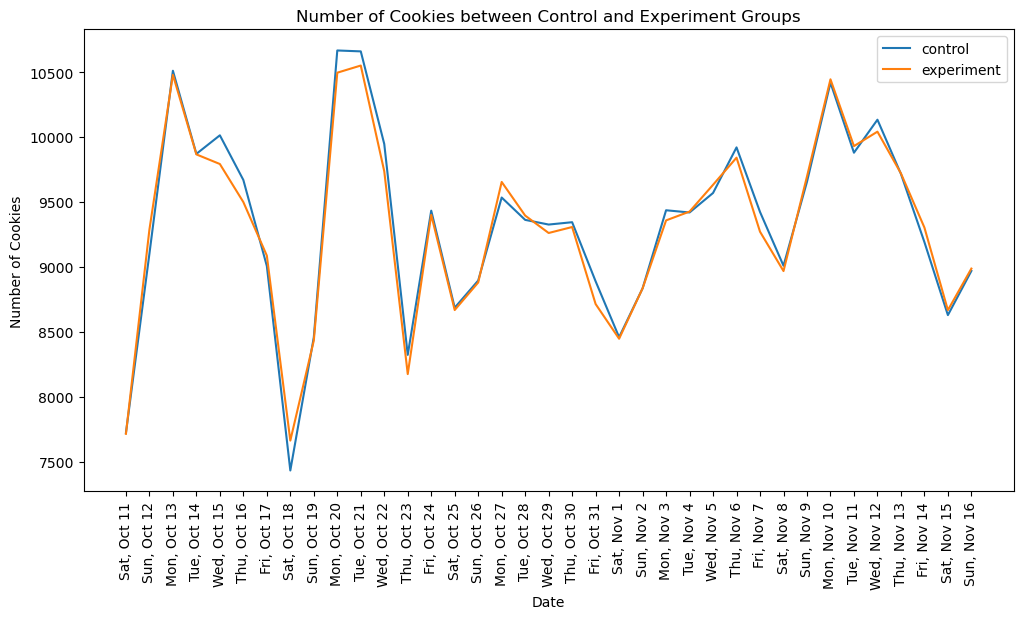

In [82]:
# invariant: Number of cookies
plt.figure(figsize=(12,6))
x = control['Date']
line1 = plt.plot(x ,control['Pageviews'],label = 'control')
line2 = plt.plot(x ,experiment['Pageviews'], label = 'experiment')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of Cookies')
plt.title('Number of Cookies between Control and Experiment Groups')
plt.legend()

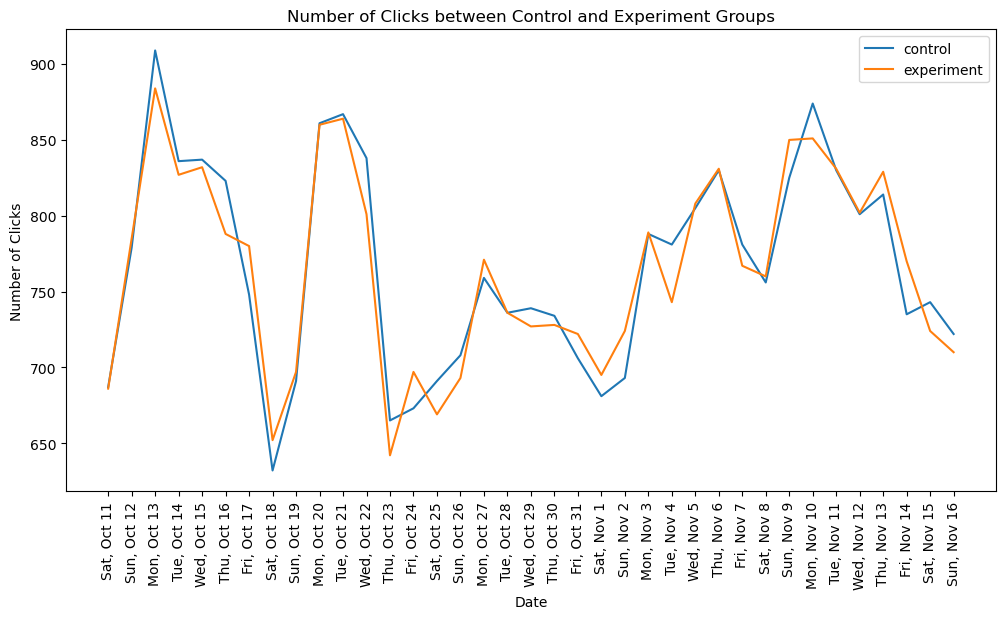

In [83]:
# invariant: Number of clicks
plt.figure(figsize=(12,6))
x = control['Date']
line1 = plt.plot(x ,control['Clicks'],label = 'control')
line2 = plt.plot(x ,experiment['Clicks'], label = 'experiment')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.title('Number of Clicks between Control and Experiment Groups')
plt.legend()

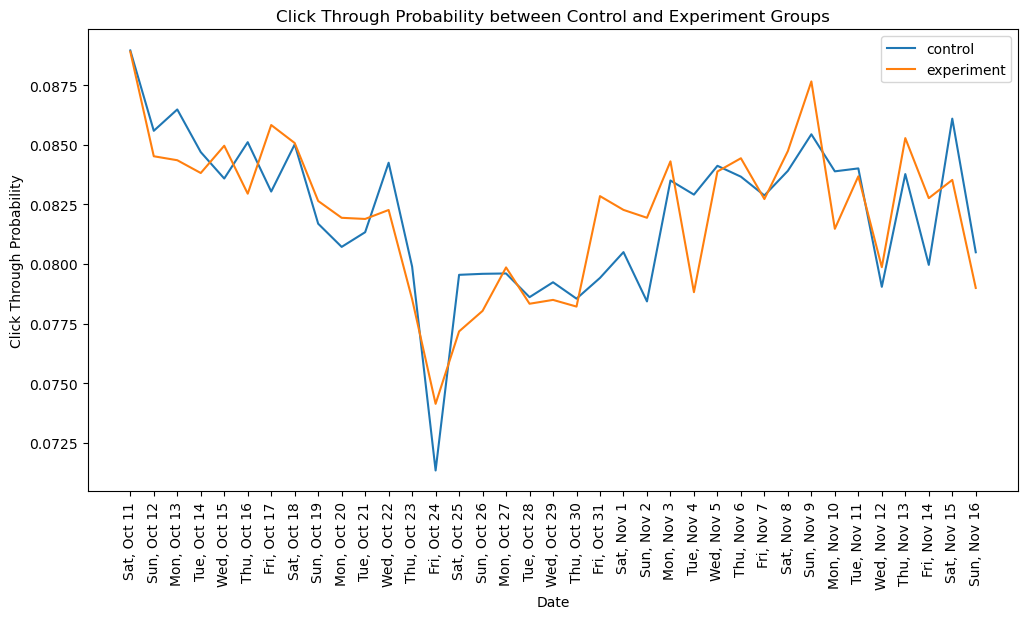

In [84]:
# invariant: click through probability (Number of clicks / Number of cookies)
plt.figure(figsize=(12,6))
x = control['Date']
line1 = plt.plot(x ,control['Clicks']/control['Pageviews'],label = 'control')
line2 = plt.plot(x ,experiment['Clicks']/experiment['Pageviews'], label = 'experiment') 
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Click Through Probability')
plt.title('Click Through Probability between Control and Experiment Groups')
plt.legend()

In [144]:
# create a new dataframe
Sanity_Check = pd.DataFrame(index = ['Cookies','Clicks','CTP'], 
                            columns=['CI_lower','CI_upper','obs','passes or not',])
Sanity_Check.obs = [control['Pageviews'].sum()/(control['Pageviews'].sum()+experiment['Pageviews'].sum()),
      control['Clicks'].sum()/(control['Clicks'].sum()+experiment['Clicks'].sum()),np.nan]
Sanity_Check

,CI_lower,CI_upper,obs,passes or not
Cookies,NaN,NaN,0.500640,NaN
Clicks,NaN,NaN,0.500467,NaN
CTP,NaN,NaN,NaN,NaN


In [145]:
# binomial test function
prob = 0.5
alpha = 0.05

def binomial_test(A,B):
    std = math.sqrt(0.5*0.5/(control[A].sum()+experiment[A].sum()))
    ME = std*1.96
    Sanity_Check.loc[B,'CI_lower'], Sanity_Check.loc[B,'CI_upper'] = 0.5-ME, 0.5+ME
    if Sanity_Check.loc[B,'CI_lower'] <= Sanity_Check.loc[B,'obs'] <= Sanity_Check.loc[B,'CI_upper']:
        Sanity_Check.loc[B,'passes or not'] = 1
    else:
        Sanity_Check.loc[B,'passes or not'] = 0 



### Cookies

First, we've already calculated the size of control group and experiment group:

control group size: 345543   
experiment size: 344660   
sample size: 690203    
Is the difference between the size of control group and experiment group within our expectations?

Given each cookie is randomly assgined to the control or experiment group with probability 0.5. If we now regard being assigned to the control group as a success, we can use the binominal distribution to model the number of successes in the given whole sample (control+experiment) and perform a binomial test as sanity check. (We further assume the whole sample size are large enough to approach the normal distribution (Central Limit Theorem)).

In [146]:
binomial_test('Pageviews','Cookies')    
    
Sanity_Check

,CI_lower,CI_upper,obs,passes or not
Cookies,0.49882,0.50118,0.500640,1
Clicks,NaN,NaN,0.500467,NaN
CTP,NaN,NaN,NaN,NaN


### Clicks

In [147]:
# For the Clicks metric, we can also use the binomial test.

binomial_test('Clicks','Clicks')    
    
Sanity_Check

,CI_lower,CI_upper,obs,passes or not
Cookies,0.49882,0.50118,0.500640,1
Clicks,0.495884,0.504116,0.500467,1
CTP,NaN,NaN,NaN,NaN


### Click Through Probability
For the click through probability, we've already assumed the sample performs the normal distribution. Therefore, we can further assume that the click through probability in both control and experiment groups perform the binomial distribution. So we can lauch a Z-test to check the click through probability. (pooled p)

In [89]:
# CTP for both groups
CTP_control = control['Clicks'].sum() / control['Pageviews'].sum()
CTP_experiment = experiment['Clicks'].sum() / experiment['Pageviews'].sum()

# sample standard deviations for both groups (distribution)
std_control = math.sqrt(CTP_control*(1-CTP_control))
std_experiment = math.sqrt(CTP_experiment*(1-CTP_experiment))

# SE pooled
SE_pooled = math.sqrt(std_control**2/control["Pageviews"].sum()+std_experiment**2/experiment["Pageviews"].sum())

# ME
ME_pooled = SE_pooled*1.96

# CI_lower, CI_upper
Sanity_Check.loc['CTP','CI_lower'],Sanity_Check.loc['CTP','CI_upper'] = 0-ME_pooled,0+ME_pooled

# obs
obs = CTP_control - CTP_experiment 
Sanity_Check.loc['CTP','obs'] = obs

# conclusion
if Sanity_Check.loc['CTP','CI_lower'] <= obs <= Sanity_Check.loc['CTP','CI_upper']:
    Sanity_Check.loc['CTP','passes or not'] = 1 
else:
    Sanity_Check.loc['CTP','passes or not'] = 0
    
Sanity_Check

,CI_lower,CI_upper,obs,passes or not
Cookies,0.49882,0.50118,0.500640,1
Clicks,0.495884,0.504116,0.500467,1
CTP,-0.001296,0.001296,-0.000057,1


Based on the Sanity_Check chart, we can conclude that all invariant metrics have stood the test successfully.

# Check for Practical and Statistical Significance

Next, for your evaluation metrics, calculate a confidence interval for the difference between the experiment and control groups, and check whether each metric is statistically and/or practically significance. A metric is statistically significant if the confidence interval does not include 0 (that is, you can be confident there was a change), and it is practically significant if the confidence interval does not include the practical significance boundary (that is, you can be confident there is a change that matters to the business.)

In [148]:
# slice the control dataset
control_sliced = control[:23]
control_sliced.tail()

# slice the experiment dataset
experiment_sliced = experiment[:23]
experiment_sliced.tail()

,Date,Pageviews,Clicks,Enrollments,Payments
18,"Wed, Oct 29",9262,727,201.0,96.0
19,"Thu, Oct 30",9308,728,207.0,67.0
20,"Fri, Oct 31",8715,722,182.0,123.0
21,"Sat, Nov 1",8448,695,142.0,100.0
22,"Sun, Nov 2",8836,724,182.0,103.0


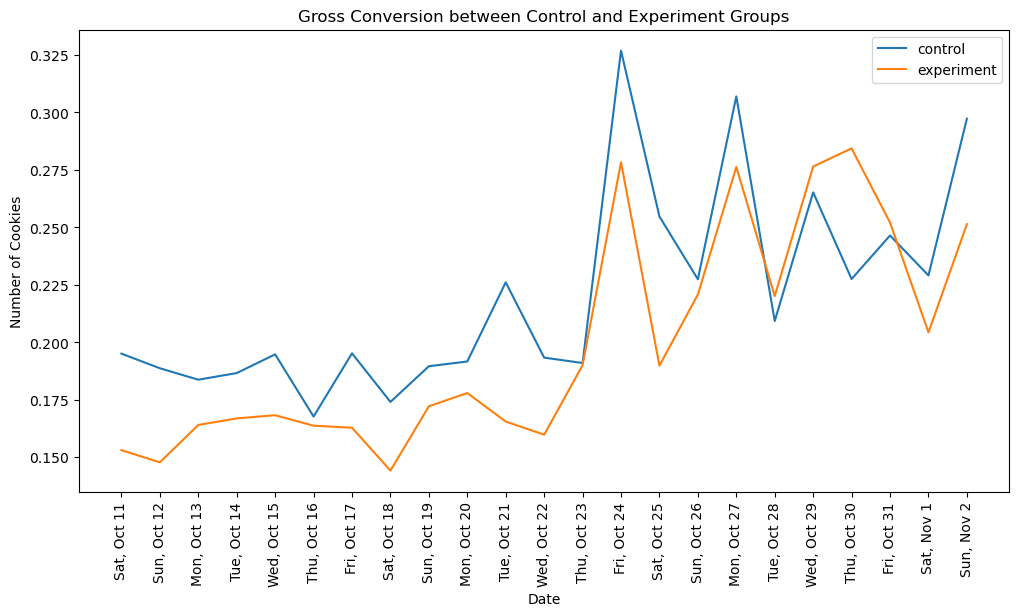

In [149]:
# evaluation metric: Gross Conversion
plt.figure(figsize=(12,6))
x = control_sliced['Date']
line1 = plt.plot(x ,control_sliced['Enrollments']/control_sliced['Clicks'],label = 'control')
line2 = plt.plot(x ,experiment_sliced['Enrollments']/experiment_sliced['Clicks'], label = 'experiment')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of Cookies')
plt.title('Gross Conversion between Control and Experiment Groups')
plt.legend()

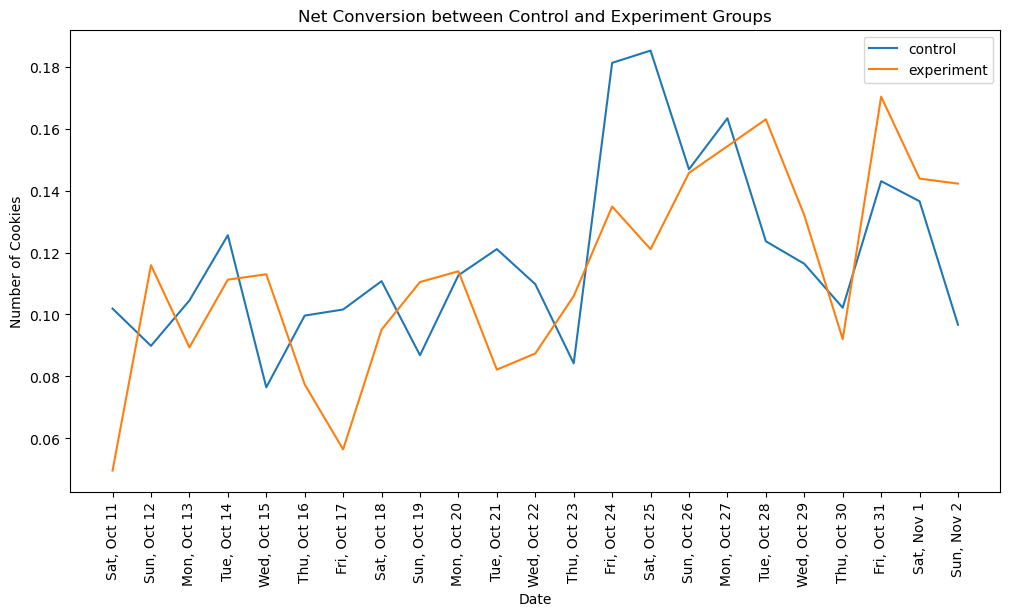

In [150]:
# evaluation metric: Net Conversion
plt.figure(figsize=(12,6))
x = control_sliced['Date']
line1 = plt.plot(x ,control_sliced['Payments']/control_sliced['Clicks'],label = 'control')
line2 = plt.plot(x ,experiment_sliced['Payments']/experiment_sliced['Clicks'], label = 'experiment')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of Cookies')
plt.title('Net Conversion between Control and Experiment Groups')
plt.legend()

In [151]:
# create a new dataframe
results = pd.DataFrame(index = ['Gross_Conversion','Net_Conversion'], 
                            columns=['CI_lower','CI_upper','obs','stats_sig?','dmin','prac_sig?'])

# dmin
results.dmin = [baseline.loc[4,'dmin'],baseline.loc[6,'dmin']]

results

,CI_lower,CI_upper,obs,stats_sig?,dmin,prac_sig?
Gross_Conversion,NaN,NaN,NaN,NaN,-0.0100,NaN
Net_Conversion,NaN,NaN,NaN,NaN,0.0075,NaN


In [152]:
# recalculate the sample size
real_size = control_sliced['Pageviews'].sum() + experiment_sliced['Pageviews'].sum()
real_size

423525

In [153]:
# Gross Conversion
control_GC = control_sliced['Enrollments'].sum()/control_sliced['Clicks'].sum()
experiment_GC = experiment_sliced['Enrollments'].sum()/experiment_sliced['Clicks'].sum()
# Net Conversion
control_NC = control_sliced['Payments'].sum()/control_sliced['Clicks'].sum()
experiment_NC = experiment_sliced['Payments'].sum()/experiment_sliced['Clicks'].sum()
                                                     
# obs
results.obs = [experiment_GC - control_GC, experiment_NC - control_NC]

# alpha = 0.05

# std
    #GC
std_control_GC = math.sqrt(control_GC*(1-control_GC))
std_experiment_GC = math.sqrt(experiment_GC*(1-experiment_GC)) 
pooled_GC = math.sqrt(std_control_GC**2/control_sliced['Clicks'].sum() + 
                   std_experiment_GC**2 /experiment_sliced['Clicks'].sum())
    #NC
std_control_NC = math.sqrt(control_NC*(1-control_NC))
std_experiment_NC = math.sqrt(experiment_NC*(1-experiment_NC)) 
pooled_NC = math.sqrt(std_control_NC**2/control_sliced['Clicks'].sum() +
                   std_experiment_NC**2 /experiment_sliced['Clicks'].sum())
    
# CI
results.loc['Gross_Conversion','CI_lower'], results.loc['Gross_Conversion','CI_upper'] = results.loc['Gross_Conversion','obs']-pooled_GC*1.96, results.loc['Gross_Conversion','obs']+pooled_GC*1.96
results.loc['Net_Conversion','CI_lower'], results.loc['Net_Conversion','CI_upper'] = results.loc['Net_Conversion','obs']-pooled_NC*1.96, results.loc['Net_Conversion','obs']+pooled_NC*1.96 

# stats check
if results.loc['Gross_Conversion','CI_lower'] <= 0 <= results.loc['Gross_Conversion','CI_upper']:
    results.loc['Gross_Conversion','stats_sig?'] = 0
else: 
    results.loc['Gross_Conversion','stats_sig?'] = 1
    
if results.loc['Net_Conversion','CI_lower'] <= 0 <= results.loc['Net_Conversion','CI_upper']:
    results.loc['Net_Conversion','stats_sig?'] = 0
else: 
    results.loc['Net_Conversion','stats_sig?'] = 1

# practical check
if results.loc['Gross_Conversion','dmin'] < 0:
    if results.loc['Gross_Conversion','obs'] <= results.loc['Gross_Conversion','dmin']:
        results.loc['Gross_Conversion','prac_sig?'] = 1 
    else: 
        results.loc['Gross_Conversion','prac_sig?'] = 0

if results.loc['Gross_Conversion','dmin'] > 0:
    if results.loc['Gross_Conversion','obs'] >= results.loc['Gross_Conversion','dmin']:
        results.loc['Gross_Conversion','prac_sig?'] = 1 
    else: 
        results.loc['Gross_Conversion','prac_sig?'] = 0
    
    
if results.loc['Net_Conversion','dmin'] < 0:
    if results.loc['Net_Conversion','obs'] <= results.loc['Net_Conversion','dmin']:
        results.loc['Net_Conversion','prac_sig?'] = 1 
    else: 
        results.loc['Net_Conversion','prac_sig?'] = 0

if results.loc['Net_Conversion','dmin'] > 0:
    if results.loc['Net_Conversion','obs'] >= results.loc['Net_Conversion','dmin']:
        results.loc['Net_Conversion','prac_sig?'] = 1 
    else: 
        results.loc['Net_Conversion','prac_sig?'] = 0   
    
    
results

,CI_lower,CI_upper,obs,stats_sig?,dmin,prac_sig?
Gross_Conversion,-0.02912,-0.011989,-0.020555,1,-0.0100,1
Net_Conversion,-0.011604,0.001857,-0.004874,0,0.0075,0


Now we can see the gross conversion decreased 2% in this A/B test, which was statiscally and practically significant while the net conversion was not.

# Run Sign Tests
For each evaluation metric, do a sign test using the day-by-day breakdown.

In [102]:
df_control_notnull = control[pd.isnull(control.Enrollments) != True]
df_experiment_notnull = experiment[pd.isnull(experiment.Enrollments) != True]

In [106]:
results_notnull = {"Control":pd.Series([df_control_notnull.Pageviews.sum(),df_control_notnull.Clicks.sum(),
                                  df_control_notnull.Enrollments.sum(),df_control_notnull.Payments.sum()],
                                  index = ["cookies","clicks","enrollments","payments"]),
           "Experiment":pd.Series([df_experiment_notnull.Pageviews.sum(),df_experiment_notnull.Clicks.sum(),
                               df_experiment_notnull.Enrollments.sum(),df_experiment_notnull.Payments.sum()],
                               index = ["cookies","clicks","enrollments","payments"])}
df_results_notnull = pd.DataFrame(results_notnull)
df_results_notnull

,Control,Experiment
cookies,212163.0,211362.0
clicks,17293.0,17260.0
enrollments,3785.0,3423.0
payments,2033.0,1945.0


In [107]:
df_results_notnull['Total']=df_results_notnull.Control + df_results_notnull.Experiment

df_results_notnull

,Control,Experiment,Total
cookies,212163.0,211362.0,423525.0
clicks,17293.0,17260.0,34553.0
enrollments,3785.0,3423.0,7208.0
payments,2033.0,1945.0,3978.0


In [108]:
# experiment values

enrollments_exp = df_results_notnull.loc["enrollments"].Experiment
clicks_exp = df_results_notnull.loc["clicks"].Experiment
payments_exp = df_results_notnull.loc["payments"].Experiment

# control values

enrollments_cont = df_results_notnull.loc["enrollments"].Control
clicks_cont = df_results_notnull.loc["clicks"].Control
payments_cont = df_results_notnull.loc["payments"].Control



# metrics

GrossConversion_exp = enrollments_exp/clicks_exp
NetConversion_exp = payments_exp/clicks_exp
GrossConversion_cont = enrollments_cont/clicks_cont
NetConversion_cont = payments_cont/clicks_cont

GrossConversion = (enrollments_exp + enrollments_cont)/(clicks_cont + clicks_exp)
NetConversion = (payments_cont + payments_exp)/(clicks_cont + clicks_exp)

In [154]:
print('GrossConversion: {} \nNetConversion:{}'.format(GrossConversion,NetConversion))

GrossConversion: 0.20860706740369866 
NetConversion:0.1151274853124186


In [112]:
GrossConversion_cont, GrossConversion_exp

(0.2188746891805933, 0.19831981460023174)

In [113]:

def stats_prop(p_hat,z_score,N_cont,N_exp,diff):
    std_err = np.sqrt((p_hat * (1- p_hat ))*(1/N_cont + 1/N_exp))
    marg_err = z_score * std_err
    ci_lower = diff - marg_err
    ci_upper = diff + marg_err
    
    return std_err,marg_err,ci_lower,ci_upper

In [114]:
GrossConversion_diff = GrossConversion_exp - GrossConversion_cont
GrossConversion_diff

-0.020554874580361565

In [116]:
se_gross,me_gross,cil_gross,ciu_gross = stats_prop(GrossConversion,1.96,clicks_cont,
                                                   clicks_exp,GrossConversion_diff)

print(se_gross,me_gross,cil_gross,ciu_gross)

0.004371675385225936 0.008568483755042836 -0.0291233583354044 -0.01198639082531873


In [117]:
NetConversion_diff = NetConversion_exp - NetConversion_cont
NetConversion_diff

-0.0048737226745441675

In [118]:
se_net,me_net,cil_net,ciu_net = stats_prop(NetConversion,1.96,clicks_cont,
                                           clicks_exp,NetConversion_diff)

print(se_net,me_net,cil_net,ciu_net)

0.0034341335129324238 0.0067309016853475505 -0.011604624359891718 0.001857179010803383


In [119]:
df_SignTest = pd.merge(df_control_notnull,df_experiment_notnull,on="Date")
df_SignTest['GrossConversion_cont'] = df_SignTest.Enrollments_x/df_SignTest.Clicks_x
df_SignTest['GrossConversion_exp'] = df_SignTest.Enrollments_y/df_SignTest.Clicks_y
df_SignTest['NetConversion_cont'] = df_SignTest.Payments_x/df_SignTest.Clicks_x
df_SignTest['NetConversion_exp'] = df_SignTest.Payments_y/df_SignTest.Clicks_y

cols = ['Date','GrossConversion_cont','GrossConversion_exp','NetConversion_cont','NetConversion_exp']

In [120]:
df_SignTest = df_SignTest[cols]
df_SignTest.head()

,Date,GrossConversion_cont,GrossConversion_exp,NetConversion_cont,NetConversion_exp
0,"Sat, Oct 11",0.195051,0.153061,0.101892,0.049563
1,"Sun, Oct 12",0.188703,0.147771,0.089859,0.115924
2,"Mon, Oct 13",0.183718,0.164027,0.104510,0.089367
3,"Tue, Oct 14",0.186603,0.166868,0.125598,0.111245
4,"Wed, Oct 15",0.194743,0.168269,0.076464,0.112981


In [121]:
df_SignTest['GC_Sign'] = df_SignTest.GrossConversion_cont - df_SignTest.GrossConversion_exp
df_SignTest['NC_Sign'] = df_SignTest.NetConversion_cont - df_SignTest.NetConversion_exp

In [122]:
df_SignTest

,Date,GrossConversion_cont,GrossConversion_exp,NetConversion_cont,NetConversion_exp,GC_Sign,NC_Sign
0,"Sat, Oct 11",0.195051,0.153061,0.101892,0.049563,0.041990,0.052330
1,"Sun, Oct 12",0.188703,0.147771,0.089859,0.115924,0.040933,-0.026065
2,"Mon, Oct 13",0.183718,0.164027,0.104510,0.089367,0.019691,0.015144
3,"Tue, Oct 14",0.186603,0.166868,0.125598,0.111245,0.019735,0.014353
4,"Wed, Oct 15",0.194743,0.168269,0.076464,0.112981,0.026474,-0.036517
5,"Thu, Oct 16",0.167679,0.163706,0.099635,0.077411,0.003974,0.022224
6,"Fri, Oct 17",0.195187,0.162821,0.101604,0.056410,0.032367,0.045194
7,"Sat, Oct 18",0.174051,0.144172,0.110759,0.095092,0.029879,0.015667
8,"Sun, Oct 19",0.189580,0.172166,0.086831,0.110473,0.017414,-0.023643
9,"Mon, Oct 20",0.191638,0.177907,0.112660,0.113953,0.013731,-0.001294


In [125]:
len(df_SignTest)

23

In [123]:
len(df_SignTest[df_SignTest.GC_Sign > 0])

19

In [124]:
len(df_SignTest[df_SignTest.NC_Sign > 0])

13

In [141]:
from scipy.stats import binom
print('p-value for sign test for gross conversion is ',2*binom.cdf(4,23,0.5))
print('p-value for sign test for net conversion is ',2*binom.cdf(10,23,0.5))

p-value for sign test for gross conversion is  0.002599477767944336
p-value for sign test for net conversion is  0.6776394844055176


## Week Analysis
At last, we were asked to finish the sign test for this A/B test. However, the prior assumption for sigh test that the two dependent samples should be paired or matched viloates our A/B test assumption. So we will forgo this additional test, instead, we can make an analysis about the seasonality.

In [96]:
df_temp = pd.merge(control_sliced, experiment_sliced, on="Date", how="left")
df_temp['Day'] = df_temp['Date'].apply(lambda x:x[:3]).tolist()
df_temp = df_temp.drop(['Date', 'Pageviews_x','Pageviews_y'],axis=1)
df_temp.head()

,Clicks_x,Enrollments_x,Payments_x,Clicks_y,Enrollments_y,Payments_y,Day
0,687,134.0,70.0,686,105.0,34.0,Sat
1,779,147.0,70.0,785,116.0,91.0,Sun
2,909,167.0,95.0,884,145.0,79.0,Mon
3,836,156.0,105.0,827,138.0,92.0,Tue
4,837,163.0,64.0,832,140.0,94.0,Wed


In [97]:
temp = df_temp.groupby(by='Day', axis=0).sum()
temp = temp.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
temp

,Clicks_x,Enrollments_x,Payments_x,Clicks_y,Enrollments_y,Payments_y
Day,,,,,,
Mon,2529,565.0,316.0,2515,511.0,296.0
Tue,2439,506.0,301.0,2427,443.0,283.0
Wed,2414,521.0,242.0,2360,469.0,260.0
Thu,2222,432.0,213.0,2158,458.0,196.0
Fri,2127,540.0,299.0,2199,503.0,261.0
Sat,2691,576.0,361.0,2702,468.0,277.0
Sun,2871,645.0,301.0,2899,571.0,372.0


In [98]:
week_data = pd.DataFrame(columns=['GC_cont','GC_exp','diff_GC','NC_cont','NC_exp','diff_NC'],index=temp.index)
week_data['GC_cont'] = temp['Enrollments_x']/temp['Clicks_x']
week_data['GC_exp'] = temp['Enrollments_y']/temp['Clicks_y']
week_data['NC_cont'] = temp['Payments_x']/temp['Clicks_x']
week_data['NC_exp'] = temp['Payments_y']/temp['Clicks_y']
week_data['diff_GC'] = week_data['GC_exp']-week_data['GC_cont']
week_data['diff_NC'] = week_data['NC_exp']-week_data['NC_cont']

week_data

,GC_cont,GC_exp,diff_GC,NC_cont,NC_exp,diff_NC
Day,,,,,,
Mon,0.223408,0.203181,-0.020228,0.124951,0.117694,-0.007257
Tue,0.207462,0.182530,-0.024932,0.123411,0.116605,-0.006806
Wed,0.215824,0.198729,-0.017096,0.100249,0.110169,0.009921
Thu,0.194419,0.212234,0.017814,0.095860,0.090825,-0.005035
Fri,0.253879,0.228740,-0.025138,0.140574,0.118690,-0.021883
Sat,0.214047,0.173205,-0.040842,0.134151,0.102517,-0.031634
Sun,0.224660,0.196964,-0.027696,0.104842,0.128320,0.023479


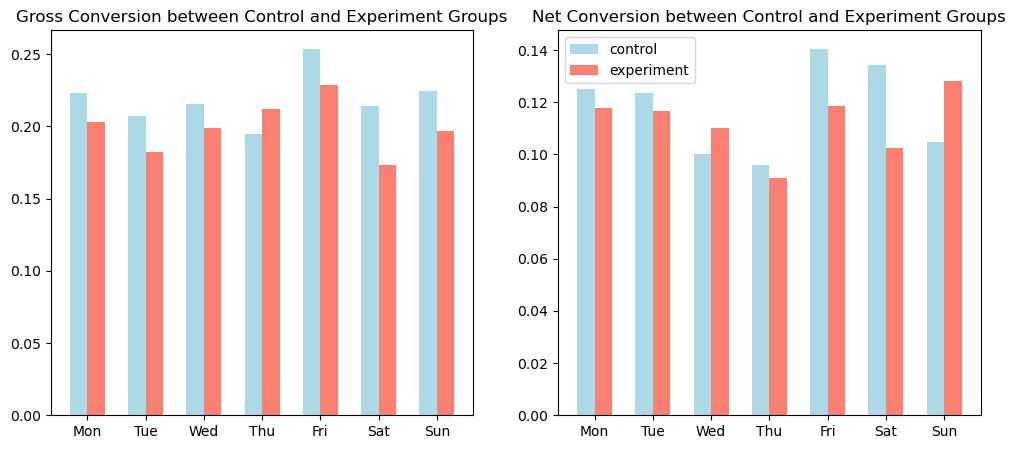

In [99]:
# visualization for GC
x=np.arange(7)
plt.figure(figsize=(12,5))


plt.subplot(121)
cont1= week_data['GC_cont']
exp1=week_data['GC_exp'] 

bar_width=0.3
tick_label=week_data.index

plt.bar(x,cont1,bar_width,color='lightblue',label='control')
plt.bar(x+bar_width,exp1,bar_width,color='salmon',label='experiment')
plt.xticks(x+bar_width/2,tick_label)
plt.title('Gross Conversion between Control and Experiment Groups')


plt.subplot(122)
cont2= week_data['NC_cont'] 
exp2=week_data['NC_exp'] 

bar_width=0.3
tick_label=week_data.index

plt.bar(x,cont2,bar_width,color='lightblue',label='control')
plt.bar(x+bar_width,exp2,bar_width,color='salmon',label='experiment')
plt.xticks(x+bar_width/2,tick_label)
plt.title('Net Conversion between Control and Experiment Groups')
plt.legend()

plt.show()


## Make a Recommendation

# Follow-Up Experiment: How to Reduce Early Cancellations

From charts above, we can see this experiment are less effective for gross conversion on Thursday, with regards to the net conversion, Wednesday and Sunday are not effective. We can also see this experiment for net conversion are more fluctuated in a week.

Results Interpretation & Recommendations
Gross conversion: the observed gross conversion in the experiment group is around 2.06% less than the gross conversion observed in the control group. Also, we see that values in the confidence interval are congruent with a negative effect. Since these values are less than the dmin (the smallest impact size considered to be business-related), the impact seems to be statiscally and practically significant. What is more, the impact of this test is much larger on Sundays while there is nearly no impact on Thursdays.

Net conversion: Although we cannot reject the null hypothesis for this test, we see that the observed net conversion in the experiment group is around 0.49% less than the net conversion observed in the control group. Therefore, for this test, the impact is not significant neither in stastics or business issue.

Based on these results, we can assume that this change may indeed help to set clearer expectations for students upfront. However, the results show that only gross conversion is practically and statiscally significant, not both gross and net converison. So we can further assume that this experiment is effective for decreasing the free trial enrollment, but payments cannot be converted. Therefore, my recommend is not to launch, instead, we should do some further experiments.

Follow-Up Experiment: How to Reduce Early Cancellations
Given that Udacity want to reduce early cancellation (early cancellation is the cancellation before the end of the 14-day free trial period that triggered the payment), we can consider from two ascpects: before the free trial enrollment and after the enrollment.

Before the free trial enrollment, our goal is to let users with more purchasing potential enroll meanwhile guide other users to access free course materials, which may attract more potential users in the long term. Therefore, based on the experiment we've done, this time we can improve the form regarding the time commitment. Firstly, this form is only used to filter students who cannot devote enough time, however, it does not contain prerequisites for the course. Some students may spend a fairly long time on this course but they are still frustrated due to lack of prerequisite knowledge. Therefore, we should also notice students the prerequisites for the course on the form. Secondly, we also need to convert non-purchasing potential student to obtain the free course materials. So if some students do not meet the commitment and prerequisites, the form should have a button that allows students to directly convert to access free course materials.
Therefore, we could launch this experiment again, but add the click through probability for the free course material as variant metric. (free course material click through probability: number of unique cookies to click the "free course material" button divided by number of unique cookies to view the course overview page).
A successful experiment would be a significant decrease in the total conversion and a significant increase in the net conversion rate and the free course materials click through probability.

For the users who have already enrolled, it is necessary to improve their user experience and make them more satisfied, so that they are willing to stay. Due to the limited coaching resources, I think the interaction between students can be increased. An effective method might be to have students led by a tutor form a group. Students can learn from and help each other, and it may also have a potential sense of competition. In this way, the group can make students more motivated and have a sense of belonging, which may lead to retention.

The experiment design: For the students who have enrolled, randomly assgin them to experiment group and control group. In the experiment group, students will be assigned to the groups according to their mentors. And in the control group, students will not be assigned.

Unit of Diversion: the unit of diversion will be user-ids, because this experiment will occur after students enrolling the free trial where they should create accounts or sign in.

Hypothesis: Null Hypotheis: Setting groups will not increase significantly the number of students who will continue their course after 14 days free trial. Alternative Hypothesis: Setting groups will increase significantly the number of students who will continue their course after 14 days free trial.

Invariant Metrics: the invariant metric should be the number of user-ids as it is the data that we can collect before the change and it is dependent on the unit of diversion for this experiment.

Evaluation Metrics: the evaluation metric will be rentention. Retention is the number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout.

If a statistically and practically significant positive change in retention is observed, given the sanity check is passed, assuming the resources and cost is acceptable for Udacity, then we can launch this experiment.



Credits to the reference: https://github.com/zyellieyan/AB-Testing-Project/tree/master
https://www.kaggle.com/mariusmesserschmied/udacity-a-b-testing-final-course-project/comments